<a href="https://colab.research.google.com/github/CaseySobon/Housing-data-prediction/blob/main/House_price_vs_Air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics

from google.colab import files

In [ ]:
uploaded = files.upload()

Saving BostonHousingData.csv to BostonHousingData.csv


In [ ]:
x1 = pd.read_csv('BostonHousingData.csv')
house_data = pd.DataFrame(x1)
house_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
X=house_data[['CRIM','ZN','INDUS','CHAS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']]
y=house_data[['NOX']]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)


In [ ]:
pop_size= 100 # size of population
gene_size = 6 # size of the gene !not more than 12(number of features)
sel_size = 10 # number of population selected for breeding

pop_set = []
for i in range(pop_size):
    chromosome = np.random.choice(12, gene_size, replace=False)
    sol_i = chromosome.astype(int)
    pop_set.append(sol_i)



In [ ]:
def fitness(pop_set):

  fitness_list=np.zeros(pop_size)
  for i in range(pop_size):
    model = LinearRegression()
    model.fit(X_train.iloc[:,pop_set[i]],Y_train)
    predictions = model.predict(X_train.iloc[:,pop_set[i]])
    acc = r2_score(Y_train, predictions)
    fitness_list[i]=acc
  ind = np.argpartition(fitness_list, -sel_size)[-sel_size:]
  return (ind,fitness_list)

In [ ]:
def mutation(child):
    m1=np.random.choice(gene_size, 1)
    m2=np.random.choice(13, 1)
    child[m1]=m2
    return child

In [ ]:
def breed(selection):
  P1=np.random.choice(sel_size, 2 ,replace=False)
  P2=np.random.random_sample(gene_size)
  parent1=np.copy(pop_set[selection[P1[0]]])
  parent2=np.copy(pop_set[selection[P1[1]]])
  for i in range(gene_size):
    if P2[i]<0.5:
        parent1[i]=np.copy(parent2[i])
    child=np.copy(parent1)
    if P1[1]<= (sel_size/2):
      child= mutation(child)
  return child


In [ ]:
for i in range(600):
    s=fitness(pop_set)
    selection = s[0]
    fitness_list=s[1]
    count=i
    child_list=[]
    for ii in range(pop_size):
        new_child=breed(selection)
        child_list.append(new_child)
    pop_set=child_list
    error = abs(np.gradient(fitness_list).mean())

    if error < 0.00001:

      ind1 = np.argpartition(fitness_list, -1)[-1:]
      print(pop_set[ind1[0]])
      print(fitness_list[ind1])
      print(count)
      del fitness_list
      break
    else: continue

[12  5  7  2  6  9]
[0.78762878]
41


R2 value = 0.7382860109729612
MSE value = 0.0037395561514498347


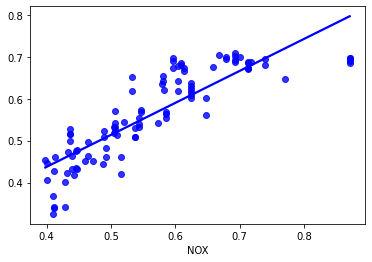

In [ ]:
model = LinearRegression()
model.fit(X_train.iloc[:,pop_set[ind1[0]]],Y_train)
predictions = model.predict(X_test.iloc[:,pop_set[ind1[0]]])
mse=mean_squared_error(Y_test, predictions)
acc = r2_score(Y_test, predictions)
print("R2 value =",acc)
print("MSE value =", mse)
sns.regplot(x=Y_test, y=predictions, ci=None, color="b")

R2 value = 0.7346279892836092
MSE value = 0.00379182457455327


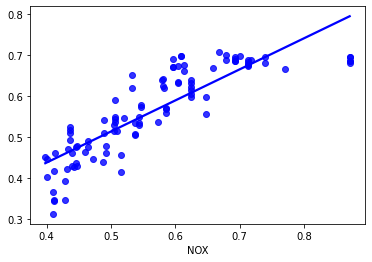

In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
mse=mean_squared_error(Y_test, predictions)
acc = r2_score(Y_test, predictions)
print("R2 value =",acc)
print("MSE value =", mse)
sns.regplot(x=Y_test, y=predictions, ci=None, color="b")